<a href="https://colab.research.google.com/github/daeunkk/dl11/blob/main/notebook/ch05_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ch05.Perceptron

##파이썬 코드로 구현
-AND 연산

In [1]:
epsilon = 0.0000001

def perceptron(x1, x2):
    w1, w2, b = 1.0, 1.0, -1.5
    sum = x1*w1+x2*w2+b
    if sum > epsilon :		# 부동소수점 오차를 방지하기 위하여
        return 1
    else :
        return 0
    
print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))

0
0
0
1


In [2]:
# Model
from sklearn.linear_model import Perceptron
X = [[160, 55],[165, 48],[163, 43],[170, 80], [175,76], [180,70]] # 항상 2차원 배열이어야 한다. 
y = [0, 0, 0, 1, 1, 1]
# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)
# 학습을 수행한다. 
clf.fit(X, y)
# 테스트를 수행한다. 
print(clf.predict(X))
print(clf.coef_) # 가중치
print(clf.intercept_) # 바이어스 값


[0 0 0 1 1 1]
[[-59. 160.]]
[-1.]


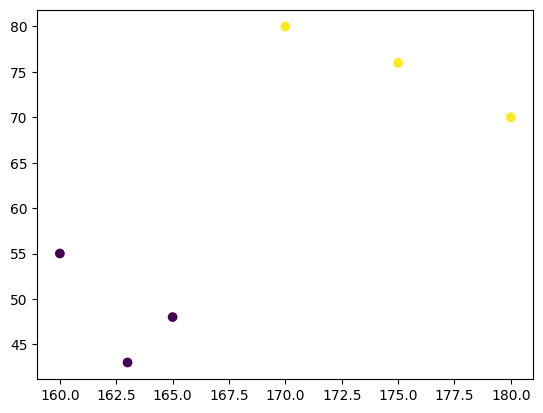

In [3]:
# Plot data
####################################
X1=[x[0] for x in X]
X2=[x[1] for x in X]
import matplotlib.pyplot as plt
plt.scatter(X1,X2,c=y)
plt.show()

In [6]:
# Check result
import numpy as np
Y1=np.array(X)@(np.array(clf.coef_).T)+clf.intercept_
epsilon = 0.0000001
def step_func(t): # 퍼셉트론의 활성화 함수
  if t > epsilon: return 1
  else: return 0
for i in range(len(Y1)): # 결과 확인
  print(step_func(Y1[i]))


0
0
0
1
1
1


In [11]:
# decision boundary
import matplotlib.pyplot as plt
from matplotlib import 
X1=[x[0] for x in X]
X2=[x[1] for x in X]
plt.scatter(X1,X2,c=y)
# 데이터에서 최소 좌표와 최대 좌표를 계산한다. 
x_min, x_max = np.array(X1).min() - 1, np.array(X1).max() + 1
y_min, y_max = np.array(X2).min() - 1, np.array(X2).max() + 1
# 0.1 간격으로 메쉬 그리드 좌표를 만든다. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# xx.shape,yy.shape # (390, 220)
# xx.ravel().shape # 390*220 = 85800
# 메쉬 그리드 데이터에 대하여 예측을 한다. 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 컨투어를 그린다. 
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cm.jet)
plt.show()


SyntaxError: ignored